# Import Libraries



In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

# Testing on image with OpenCV

The input type is <class 'numpy.ndarray'>
Shape: (581, 419, 3)


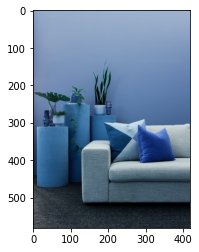

In [2]:
image = cv2.imread('/content/sampleimg.jpeg')
print('The input type is {}'.format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

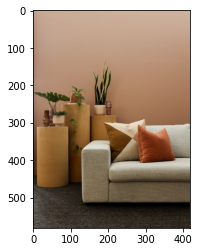

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

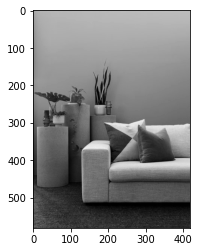

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

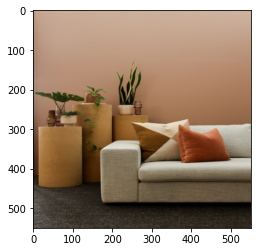

In [5]:
resized_image = cv2.resize(image, (550,550))
plt.imshow(resized_image)

# Color Indentification

In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [7]:
def get_image(image_path):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  return image

In [8]:
def get_colors(image, number_of_colors,show_chart):
  modified_image = cv2.resize(image,(550,550),interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1],3)

  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)

  counts = Counter(labels)
  counts = dict(sorted(counts.items()))

  center_colors = clf.cluster_centers_
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  if(show_chart):
    plt.figure(figsize = (8,6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

  return rgb_colors

[array([144.1644948 ,  96.72639308,  48.48069629]),
 array([196.52486562, 167.59364922, 145.71011329]),
 array([56.20532983, 45.12915678, 31.11926343]),
 array([95.7115772 , 81.46751195, 61.22901608]),
 array([182.60753016, 145.20658575, 118.90405056]),
 array([165.68159086, 123.43967151,  89.69109286]),
 array([23.59678633, 16.9864037 ,  9.29052021]),
 array([209.77478006, 204.14477028, 189.73616813]),
 array([106.58870525,  58.92340062,  23.39208392]),
 array([132.10199497, 109.64122035,  83.00741373])]

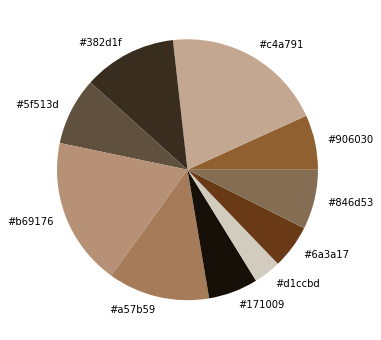

In [9]:
get_colors(get_image('/content/sampleimg.jpeg'), 10, True)

# Search Images Using Color


In [10]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'PURPLE': [170,116,211],
    'ORANGE': [250,83,0],
    'BLUE': [0, 0, 128]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
  if not file.startswith('.'):
    images.append(get_image(os.path.join(IMAGE_DIRECTORY,file)))

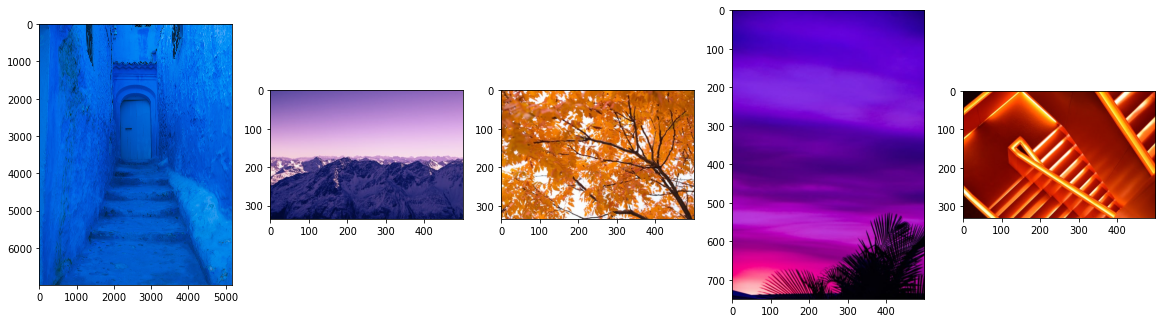

In [11]:
plt.figure(figsize=(20,10))
for i in range (len(images)):
  plt.subplot(1,len(images),i+1)
  plt.imshow(images[i])

In [12]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [13]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],color,threshold,colors_to_match)
        
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

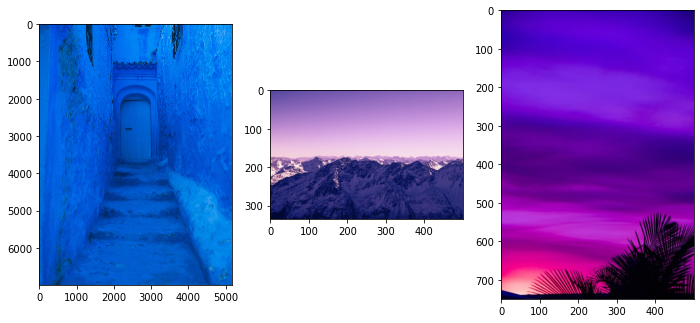

In [14]:
#search for PURPLE
plt.figure(figsize = (20,10))
show_selected_images(images, COLORS['PURPLE'],60,5)

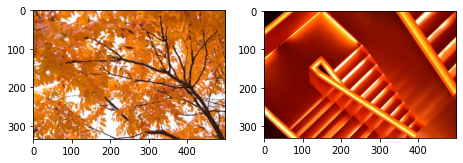

In [15]:
#search for ORANGE
plt.figure(figsize = (20,10))
show_selected_images(images, COLORS['ORANGE'],60,5)

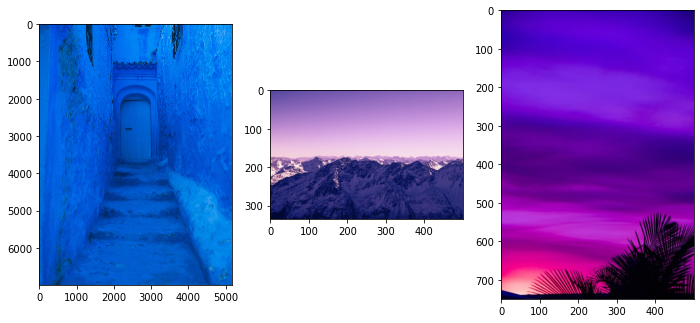

In [16]:
#search for BLUE
plt.figure(figsize = (20,10))
show_selected_images(images, COLORS['BLUE'],60,5)